# <center>Proyecto 2</center>
<center><b>Modelación y Simulación</b></center>
<center>Javier Anleu Alegría - 17149</center>

<center>Andrea Argüello - 17801</center>

## Problema a resolver
Los sistemas de control difusos (o _fuzzy_ en inglés) son sistemas de control basados en lógica difusa, tomando valores de entrada que pueden tomar un valor continuo entre 0 y 1, en contraste a la lógica digital clásica que opera con valores discretos, ya sea 0 o 1. Estos sistemas son bastante comunes en el uso de máquinas, tales como lavadoras, controles de temperatura, sistemas de simulación de tránsito, e incluso fue implementado en el Subway de Sendai en Japón en 1985 (Fuente: Wikipedia https://en.wikipedia.org/wiki/Fuzzy_control_system)


## Aplicación
El sistema a simular será un controlador difuso de un ventilador, cuya salida será la velocidad del ventilador, y las entradas serán la temperatura y humedad del ambiente.

## Implementación

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
temp = ctrl.Antecedent(np.arange(10, 40, 1), 'temperature')
hum = ctrl.Antecedent(np.arange(0, 100, 1), 'humidity')
vel = ctrl.Consequent(np.arange(0, 100, 1), 'speed')

temp['cold'] = fuzz.trimf(temp.universe, [10,10,25])
temp['medium'] = fuzz.trimf(temp.universe, [15,25,35])
temp['hot'] = fuzz.trimf(temp.universe, [25,40,40])

hum['dry'] = fuzz.trapmf(hum.universe, [0,0,20,60])
hum['normal'] = fuzz.trapmf(hum.universe, [30,45,75,90])
hum['wet'] = fuzz.trimf(hum.universe, [60,100,100])

vel['slow'] = fuzz.trimf(vel.universe, [0,0,50])
vel['moderate'] = fuzz.trimf(vel.universe, [10,50,90])
vel['fast'] = fuzz.trimf(vel.universe, [50,100,100])

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


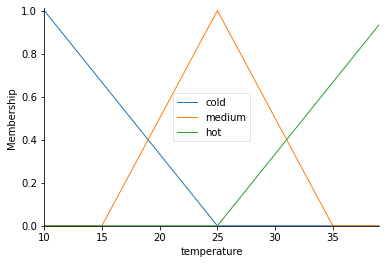

In [3]:
temp.view()

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


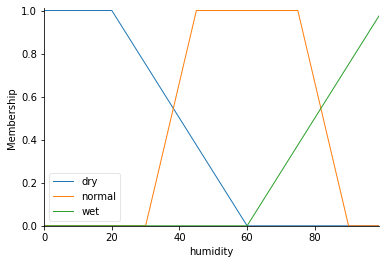

In [4]:
hum.view()

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


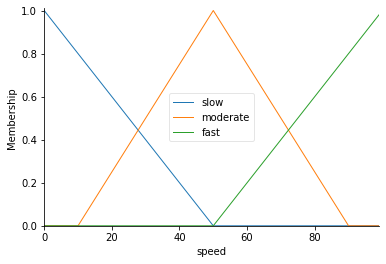

In [5]:
vel.view()

In [6]:
# Reglas
r1 = ctrl.Rule(temp['cold'] & hum['dry'], vel['moderate'])
r2 = ctrl.Rule(temp['medium'] & hum['dry'], vel['fast'])
r3 = ctrl.Rule(temp['hot'] & hum['dry'], vel['fast'])
r4 = ctrl.Rule(temp['cold'] & hum['normal'], vel['slow'])
r5 = ctrl.Rule(temp['medium'] & hum['normal'], vel['moderate'])
r6 = ctrl.Rule(temp['hot'] & hum['normal'], vel['fast'])
r7 = ctrl.Rule(temp['cold'] & hum['wet'], vel['slow'])
r8 = ctrl.Rule(temp['medium'] & hum['wet'], vel['slow'])
r9 = ctrl.Rule(temp['hot'] & hum['wet'], vel['moderate'])

In [7]:
fan_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5, r6, r7, r8, r9])
fan = ctrl.ControlSystemSimulation(fan_ctrl)

37.72311294171936


c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


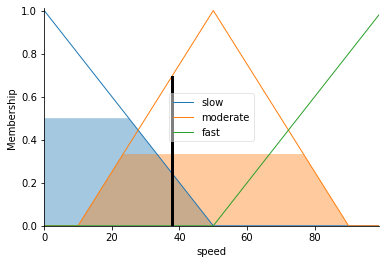

In [16]:
# Simulamos para una temperatura de 30 y humedad de 90
fan.input['temperature'] = 30
fan.input['humidity'] = 90
fan.compute()
print(fan.output['speed'])
vel.view(sim=fan)

47.871701870421724


c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


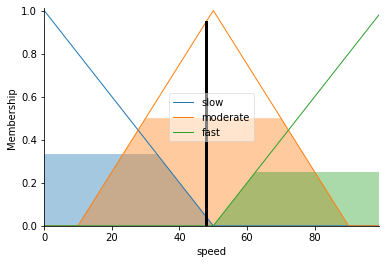

In [9]:
# Simulamos para una temperatura de 20 y humedad de 50
fan.input['temperature'] = 20
fan.input['humidity'] = 50
fan.compute()
print(fan.output['speed'])
vel.view(sim=fan)

49.999999999999936


c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


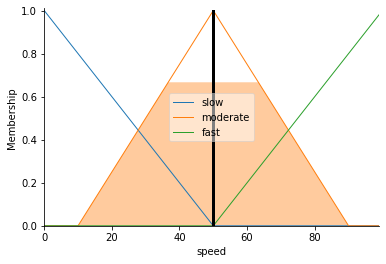

In [10]:
# Simulamos para una temperatura de 15 y humedad de 20
fan.input['temperature'] = 15
fan.input['humidity'] = 20
fan.compute()
print(fan.output['speed'])
vel.view(sim=fan)

44.04305164455532


c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


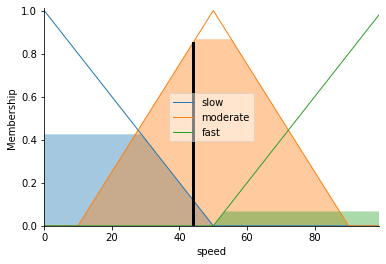

In [17]:
# Simulamos para una temperatura de 26 y humedad de 77
fan.input['temperature'] = 26
fan.input['humidity'] = 77
fan.compute()
print(fan.output['speed'])
vel.view(sim=fan)

## Recomendaciones

## Referencias
Gafa, C. (2020). A very brief introduction to Fuzzy Logic and Fuzzy Systems. _Towards Data Science_. Recuperado de https://towardsdatascience.com/a-very-brief-introduction-to-fuzzy-logic-and-fuzzy-systems-d68d14b3a3b8